# 『ウェブ最適化ではじめる機械学習』の写経

In [1]:
import os
import sys

sys.path.append(os.path.join('../.venv/Lib/site-packages/'))

In [2]:
import numpy as np
from matplotlib import pyplot as plt

## Chap. 2 probabilistic programming

In [3]:
import pymc3 as pm

In [4]:
N = 40 # アリスのデザインA案の表示数
a = 2  # アリスのデザイン案のクリック数

In [5]:
# 統計モデル作成
with pm.Model() as model:
    theta = pm.Beta('theta', alpha=1, beta=1)
    obs = pm.Binomial('a', p=theta, n=N, observed=a)
    trace = pm.sample(5000, chains=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [theta]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 9 seconds.


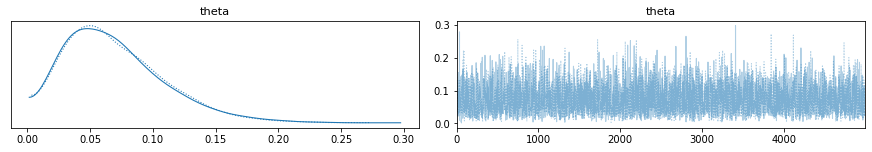

In [5]:
with model:
    pm.traceplot(trace)

In [6]:
with model:
    print(pm.summary(trace, hdi_prob=0.95))

        mean    sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
theta  0.071  0.04     0.008      0.147      0.001      0.0    4774.0  4774.0   

       ess_bulk  ess_tail  r_hat  
theta    4182.0    4528.0    1.0  


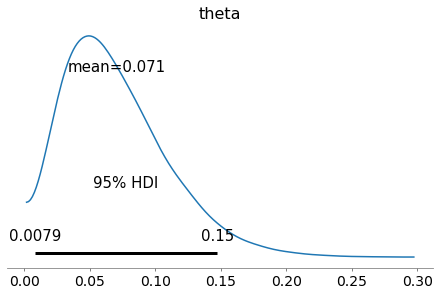

In [7]:
with model:
    pm.plot_posterior(trace, hdi_prob=0.95)

In [8]:
# アリスのデザインA案のクリック率は1%以上か
print((trace['theta'] - 0.01 > 0).mean())

0.99


In [9]:
with pm.Model() as model:
    theta = pm.Uniform('theta', lower=0, upper=1, shape=2)
    obs = pm.Binomial('obs', p=theta, n=[40,50], observed=[2,4])
    trace = pm.sample(5000, chains=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [theta]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 8 seconds.


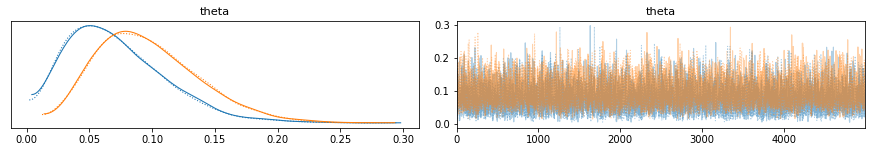

In [10]:
with model:
    pm.traceplot(trace, ['theta'], compact=True)

In [11]:
# アリスのデザイン案で違いはでるのか
print((trace['theta'][:,1] - trace['theta'][:,0]>0).mean())

0.6824


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [theta]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 8 seconds.


0.9996


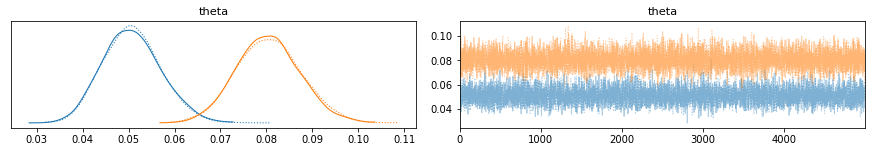

In [12]:
# Bob のデザイン案
with pm.Model() as model:
    theta = pm.Beta('theta', alpha=1, beta=1, shape=2)
    obs = pm.Binomial('obs', p=theta, n=[1280, 1600], observed=[64, 128])
    trace = pm.sample(5000, chains=2)
    print((trace['theta'][:,1] - trace['theta'][:,0]>0).mean())
    pm.traceplot(trace, ['theta'], compact=True)

### カテゴリ分布の場合

In [15]:
n_a = [20,10,36,91,170]
data = []
for i in range(len(n_a)):
    data += [i for _ in range(n_a[i])]
with pm.Model() as model_a:
    theta = pm.Dirichlet('theta', a=np.array([1,1,1,1,1]))
    obs = pm.Categorical('obs', p=theta, observed=data)
    trace_a = pm.sample(5000, chains=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [theta]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 11 seconds.


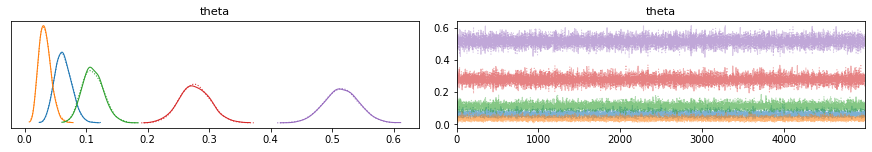

In [16]:
with model_a:
    pm.traceplot(trace_a)

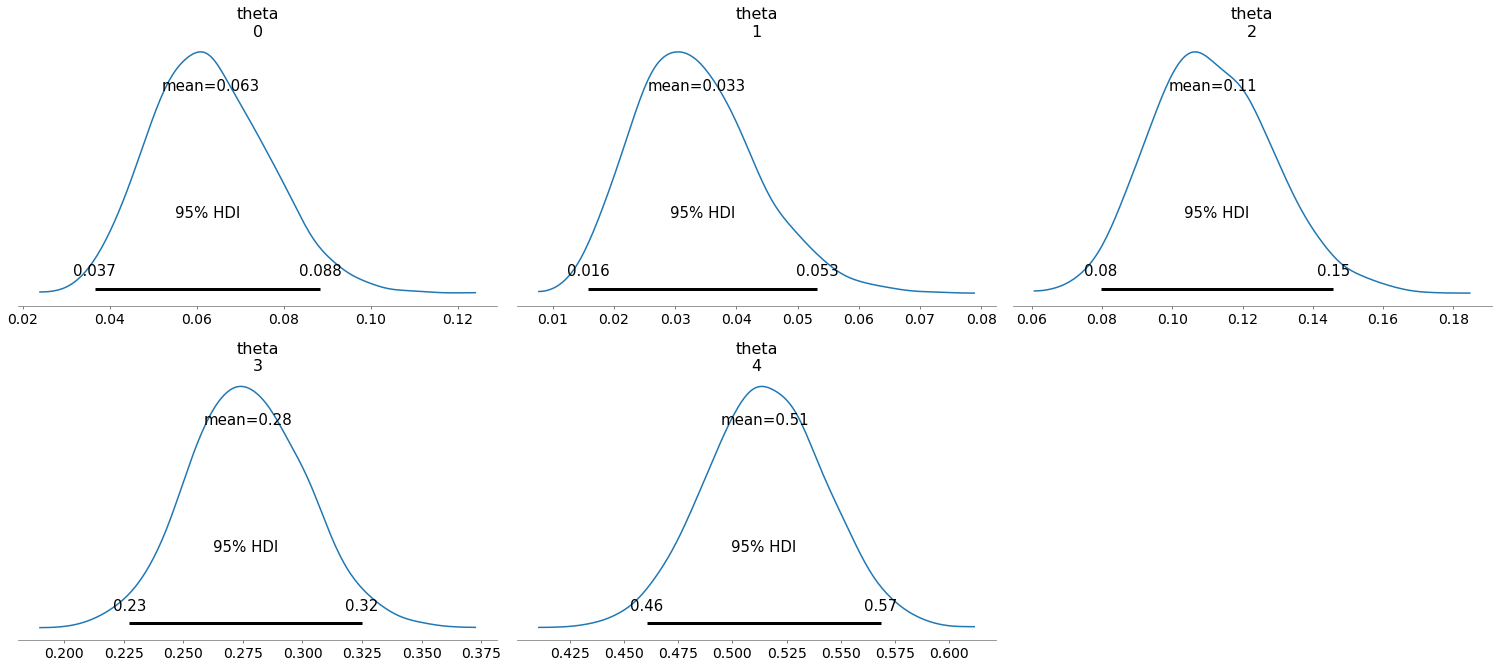

In [17]:
with model_a:
    pm.plot_posterior(trace_a, hdi_prob=0.95)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [theta]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 11 seconds.


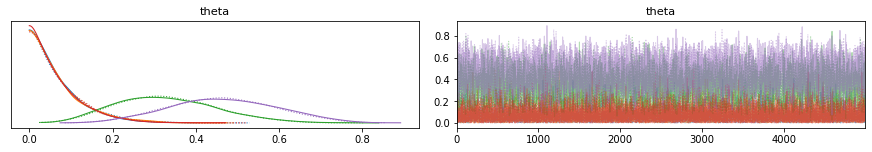

In [18]:
# 多項分布の導入
n_b = np.array([0,0,4,0,6])
with pm.Model() as model_b:
    theta = pm.Dirichlet('theta', a=np.array([1,1,1,1,1]))
    obs = pm.Multinomial('obs', p=theta, n=n_b.sum(), observed=n_b)
    trace_b = pm.sample(5000, chains=2)
    pm.traceplot(trace_b)

### 滞在時間をテストする

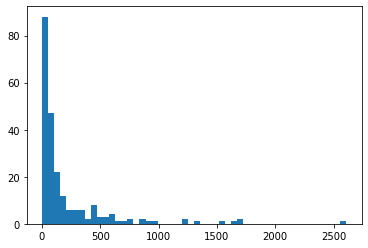

In [21]:
import urllib
url = 'https://www.oreilly.co.jp/pub/9784873119168/data/time-on-page.csv'
response = urllib.request.urlopen(url)
data = [int(row.strip()) for row in response.readlines()]
plt.hist(data, bins=50)
plt.show()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [theta]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 8 seconds.


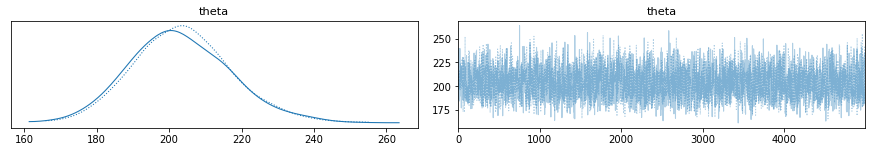

In [22]:
with pm.Model() as model:
    theta = pm.Uniform('theta', lower=0, upper=3000)
    obs = pm.Exponential('obs', lam=1/theta, observed=data)
    trace = pm.sample(5000, chains=2)
    pm.traceplot(trace)

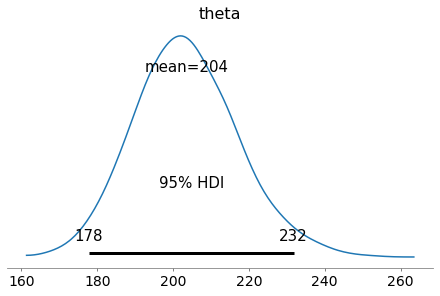

In [23]:
with model:
    pm.plot_posterior(trace, hdi_prob=0.95)